# <center> Spherical K-Means: Pattern Discovery in Textures <center>

The classical k-means method of clustering minimizes the sum of squared distances between 
cluster centres and cluster members. The intuition is that the radial distance from the
Cluster- Centre should be similar for all elements of that cluster. The spherical k-means
algorithm, however, is equivalent to the k-means algorithm with cosine similarity, a popular 
method for clustering high-dimensional data. The idea is to set the centre of each cluster such 
that it makes the angle between components both uniform and minimal.

### Question:
Generate a dummy dataset using Scikit-Learn having high dimensionality (number of 
features >10) and total 4 classes. For this dataset, first implement K-Means clustering and 
then use the clusters for classification purpose. Now using the same dataset, implement 
spherical clustering and then check accuracy for classification. Notice the change in accuracy. 
You may also plot the obtained clusters from both the methods using t-SNE plots or by 
projecting data into two dimensions using PCA.

### Procedure:
- Importing Librarirs
- Creating a high Dimentional Dataset with 4 classes
- Split the dataset into Train and test
- Use K-means Clustering
- Use Spherical K-means clustering
- Classification using K-means
- Classifucation using Spherical  K-Means
- Dimentionality Reduction for Visualization
- Plot the results

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


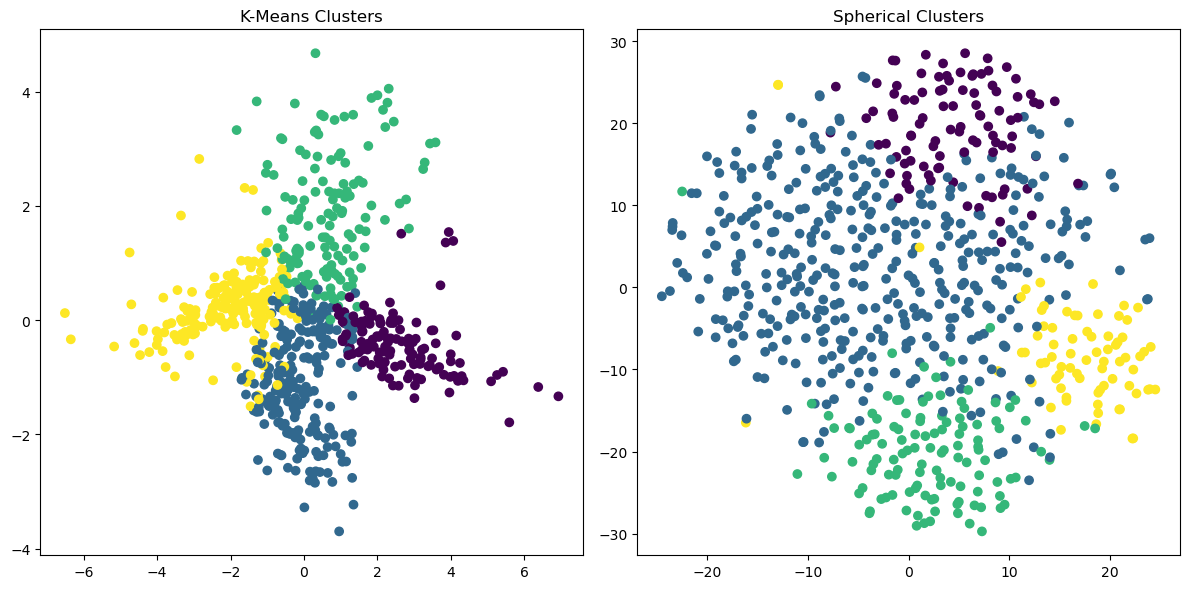

Accuracy using K-Means clustering: 0.12333333333333334
Accuracy using spherical clustering: 0.25666666666666665


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Create a high-dimensional dataset with 4 classes
n_samples = 1000
n_features = 20
n_classes = 4

X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,n_clusters_per_class=1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Means clustering
kmeans = KMeans(n_clusters=n_classes, random_state=42)
kmeans_clusters = kmeans.fit_predict(X_train)

# Spherical clustering
spectral_clustering = SpectralClustering(n_clusters=n_classes, affinity='nearest_neighbors', random_state=42)
spectral_clusters = spectral_clustering.fit_predict(X_train)

# Classification using K-Means clusters
knn_kmeans = KNeighborsClassifier(n_neighbors=1)
knn_kmeans.fit(X_train, kmeans_clusters)
y_pred_kmeans = knn_kmeans.predict(X_test)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)

# Classification using spherical clusters
knn_spectral = KNeighborsClassifier(n_neighbors=1)
knn_spectral.fit(X_train, spectral_clusters)
y_pred_spectral = knn_spectral.predict(X_test)
accuracy_spectral = accuracy_score(y_test, y_pred_spectral)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

X_pca = pca.fit_transform(X_train)
X_tsne = tsne.fit_transform(X_train)

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title("K-Means Clusters")

plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=spectral_clusters, cmap='viridis')
plt.title("Spherical Clusters")

plt.tight_layout()
plt.show()

print("Accuracy using K-Means clustering:", accuracy_kmeans)
print("Accuracy using spherical clustering:", accuracy_spectral)
